In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import random

## Get the data!

In [15]:
path_to_data = "./data/data.csv"
data = pd.read_csv(path_to_data)

data

goal_diff  win_diff  won_series
0              1  0.142857        True
1              2  0.285714        True
2              1  0.142857        True
3              2  0.285714        True
4              1  0.142857        True
...          ...       ...         ...
10707         -2 -0.166667        True
10708         -6 -0.333333        True
10709         -4 -0.166667        True
10710         -3  0.000000        True
10711          1  0.166667        True

[10712 rows x 3 columns]

## Let's visualize!

Blue dots means that the blue team won and orange dots means the orange team won.

In [154]:
colors = np.where(data['won_series'], "blue", "orange")

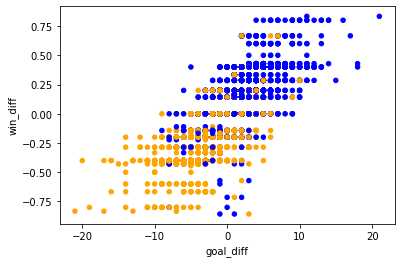

In [155]:
data.plot.scatter(x='goal_diff', y='win_diff', c=colors)

## Splitting the data

We first combine the our two inputs, goal differential and win differential into a 2D list.

Then we can seperate our data into training and test data. Won series is our actual values.

In [211]:
data_as_list = list(zip(data['goal_diff'], data['win_diff']))
X_train, X_test, y_train, y_test = train_test_split(
    data_as_list, list(data['won_series']),test_size=0.25, shuffle=True
)

## C-Support Vector Machine

Make sure we set probablity to true so we get a percentage during prediction. Then, let's fit our training data.

In [212]:
clf = SVC(probability=True)
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### So how did it do?

In [228]:
clf.score(X_test, y_test)

0.7206870799103808

In [214]:
len(data['won_series']), len(y_test), type( y_test)

(10712, 2678, list)

### Example sample

In [226]:
i = random.choice(range(len(X_test)))
print("Tested values:")
print("Goal Differential: ", X_test[i][0])
print("Win Differential: ", X_test[i][1])
print("Expected value: ", y_test[i])
print("Blue Win Probability: ", clf.predict_proba([X_test[i][:]])[0][1])

Tested values:
Goal Differential:  -1
Win Differential:  -0.2
Expected value:  True
Blue Win Probability:  0.2539486917503858


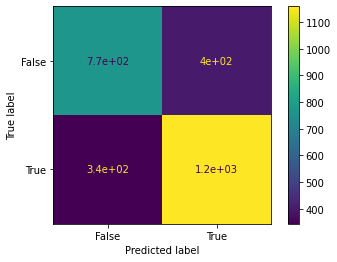

In [231]:
disp = plot_confusion_matrix(clf, X_test, y_test)

## Stochastic Gradient Descent

In [269]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(loss="hinge", penalty="elasticnet", max_iter=1000)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='elasticnet', power_t=0.5, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=False)

In [270]:
sgd_clf.score(X_test, y_test)

0.7330097087378641

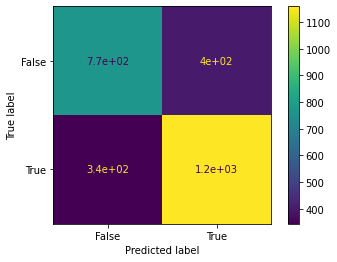

In [271]:
disp = plot_confusion_matrix(clf, X_test, y_test)